In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img

Saving sample_smaller.png to sample_smaller (1).png


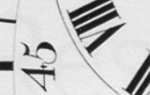

In [4]:
# I = cv2.imread('sample_smaller.png', cv2.IMREAD_GRAYSCALE)
# cv2.imshow('image', I)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

from google.colab import files
myfile = files.upload()

I = cv2.imread('sample_smaller.png', cv2.IMREAD_GRAYSCALE)  # 이미지를 Gray Scale로 불러오기

from google.colab.patches import cv2_imshow # colab에서 cv2.imshow를 이용하기 위한 코드
cv2_imshow(I)

In [38]:
# 빈칸 채우기 - 초기화 
scale = 6                             
pixel_replication = np.zeros(( 6*I.shape[0] , 6*I.shape[1] ), dtype=np.uint8)
bilinear_interpolation = np.zeros(( 6*I.shape[0] , 6*I.shape[1] ), dtype=np.uint8)

In [35]:
# Step2 - Pixel Replication 구현, Template 코드 무시하고 본인이 직접 구현하셔도 됩니다.
def make_pixel_replication(img, scale_factor, result):
    p = 0
    q = 0
    for i in range( scale_factor*img.shape[0] ):                    # 반복문 채우기
        for j in range( scale_factor*img.shape[1] ):               # 반복문 채우기
            result[i, j] = img[p, q]       
            if  (j+1) % scale_factor  == 0:                 # If문 조건 채우기
            # 0 부터 시작하기 때문에 j+1과 scale factor의 mod가 0이되는부분에 q를 바꾸어주어야함. ex) j = 0, 5, 11, ...
                q = q + 1
        q = 0
        if  (i+1) % scale_factor == 0:                     # If문 조건 채우기
        # 0 부터 시작하기 때문에 i+1과 scale factor의 mod가 0이되는부분에 p를 바꾸어주어야함. ex) i = 0, 5, 11, ...
            p = p + 1
            
    return result

In [51]:
#  Step3 - Bilinear Interpolation, Template 코드 무시하고 본인이 직접 구현하셔도 됩니다.

# 강의자료와 실습과제 PPT에 있는 공식을 이용하세요
def make_bilinear_interpolation(img, scale_factor, result):
    
    for i in range(scale_factor*img.shape[0]):                                # 반복문 채우기
        x1 = np.floor(i/scale_factor)
        x2 = np.ceil(i/scale_factor)
        if x2 == img.shape[0]:
            x2 = img.shape[0]-1

        x = np.mod((i)/scale_factor, 1)

        for j in range(scale_factor*img.shape[1]):                            # 반복문 채우기
            y1 = np.floor(j/scale_factor)
            y2 = np.ceil(j/scale_factor)
            if y2 == img.shape[1]:
                y2 = img.shape[1]-1

            left_bottom = img[ int(x2) , int(y1) ]                         # 좌표 채우기
            right_bottom = img[ int(x2) , int(y2) ]                        # 좌표 채우기
            left_top = img[ int(x1) , int(y1) ]                            # 좌표 채우기
            right_top = img[ int(x1) , int(y2) ]                           # 좌표 채우기
            y = np.mod(j/scale_factor, 1)
            inter_top = (right_top * y) + (left_top*(1-y))                 # 연산자 및 채워넣기, left_top과 left_bottom의 interpolation
            inter_bottom = (right_bottom * y) + (left_bottom * (1-y))              # 연산자 및 채워넣기, right_top과 right_bottom의 interpolation

            result[i, j] = (inter_bottom * x) + (inter_top * (1-x))
            
    return result

In [55]:
make_pixel_replication(I,scale,pixel_replication)

array([[228, 228, 228, ..., 230, 230, 230],
       [228, 228, 228, ..., 230, 230, 230],
       [228, 228, 228, ..., 230, 230, 230],
       ...,
       [230, 230, 230, ..., 213, 213, 213],
       [230, 230, 230, ..., 213, 213, 213],
       [230, 230, 230, ..., 213, 213, 213]], dtype=uint8)

In [54]:
make_bilinear_interpolation(I,scale,bilinear_interpolation)

array([[228, 228, 228, ..., 230, 230, 230],
       [228, 228, 228, ..., 230, 230, 230],
       [228, 228, 228, ..., 230, 230, 230],
       ...,
       [230, 229, 229, ..., 213, 213, 213],
       [230, 229, 229, ..., 213, 213, 213],
       [230, 229, 229, ..., 213, 213, 213]], dtype=uint8)

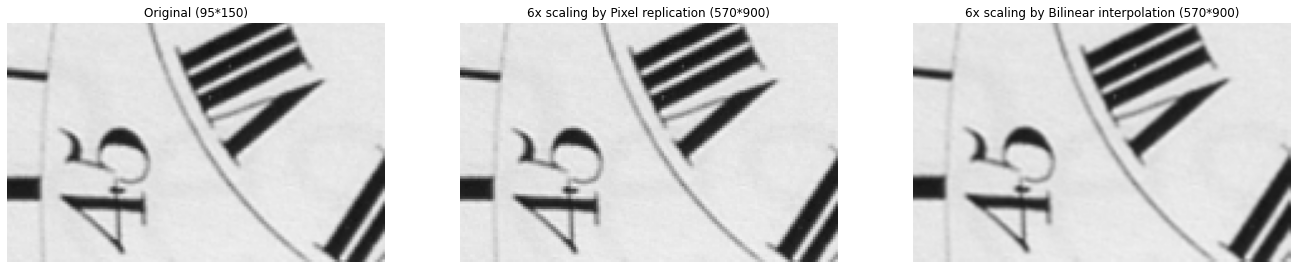

In [59]:
# 실험 결과를 아래 보여주시고 두 방법의 성능을 비교한 걸 주석으로 작성하세요.

fig = plt.figure(figsize = (23, 5)) # rows*cols 행렬의 i번째 subplot 생성
rows = 1
cols = 3

ax1 = fig.add_subplot(rows, cols, 1)
I_RGB = cv2.cvtColor(I, cv2.COLOR_GRAY2RGB)
ax1.imshow(I_RGB)
ax1.set_title('Original (95*150)')
ax1.axis("off")

ax2 = fig.add_subplot(rows, cols, 2)
PR_S6_RGB = cv2.cvtColor(pixel_replication, cv2.COLOR_GRAY2RGB)
ax2.imshow(PR_S6_RGB)
ax2.set_title('6x scaling by Pixel replication (570*900)')
ax2.axis("off")
# Pixel replication 방식의 장점은 단순히 근처의 픽셀 값만 복사해 오면 되므로 연산이 굉장히 빠르다.
# 단점은 확대 후에 근처값을 가져오기 때문에 Bilinear Interpolation에 비해 픽셀들이 부드럽게 이어지지 않고, 모자이크 현상이 생긴다. 

ax3 = fig.add_subplot(rows, cols, 3)
BI_S6_RGB = cv2.cvtColor(bilinear_interpolation, cv2.COLOR_GRAY2RGB)
ax3.imshow(BI_S6_RGB)
ax3.set_title('6x scaling by Bilinear interpolation (570*900)')
ax3.axis("off")
# Bilinear interpolation의 경우 근처 4픽셀들의 값을 이용하여 직선을 그리고, 그에 따라 추정값을 가져오므로 Pixel replication에 비해 더 부드러운 결과를 보여준다.
# 하지만 여전히 약간의 Blur가 있고, Pixel replacation에 비해 연산속도가 느리다.

plt.show()